This shall contain all the statistical anaylsis Borough wise.

In [2]:
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv("Dataset1.csv")

/tmp/ipykernel_14546/2149461605.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset1.csv")


In [5]:
df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)

In [15]:
df

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,1922171,2012-07-01,12:44,NaN,NaN,NaN,NaN,NaN,HORACE HARDING EXPRESSWAY,108 STREET,...,0,0,0,0,0,Unspecified,Unspecified,254996,PASSENGER VEHICLE,PASSENGER VEHICLE
1,1921573,2012-07-01,21:30,BROOKLYN,11237,40.694988,-73.907296,"(40.6949882, -73.9072959)",IRVING AVENUE,WEIRFIELD STREET,...,0,0,0,0,0,Unspecified,Unspecified,184525,PASSENGER VEHICLE,UNKNOWN
2,1922185,2012-07-01,12:07,BROOKLYN,11206,40.708627,-73.945124,"(40.7086265, -73.9451243)",MANHATTAN AVENUE,SCHOLES STREET,...,0,0,0,3,0,Unspecified,Unspecified,193860,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE
3,1922186,2012-07-01,9:40,QUEENS,11369,40.767470,-73.881859,"(40.7674704, -73.8818593)",23 AVENUE,88 STREET,...,0,0,0,0,0,Unspecified,Unspecified,279641,PICK-UP TRUCK,SPORT UTILITY / STATION WAGON
4,1922187,2012-07-01,0:25,QUEENS,11375,40.732979,-73.844348,"(40.7329792, -73.8443478)",GRND CNTRL PARKWAY SR WEST,65 AVENUE,...,0,0,0,0,0,Unspecified,Unspecified,264072,PASSENGER VEHICLE,PASSENGER VEHICLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304278,1621044,2013-12-31,10:45,MANHATTAN,10033.0,40.851180,-73.939238,"(40.8511796, -73.9392377)",WEST 181 STREET,PINEHURST AVENUE,...,0,0,0,0,0,Unspecified,Unspecified,72297,PASSENGER VEHICLE,BUS
304279,1621042,2013-12-31,16:15,MANHATTAN,10010.0,40.735390,-73.975110,"(40.7353901, -73.9751095)",AVENUE C,EAST 23 STREET,...,0,0,0,0,0,Unspecified,Unspecified,25634,VAN,PASSENGER VEHICLE
304280,1629281,2013-12-31,18:40,BRONX,10468.0,40.862735,-73.903320,"(40.862735, -73.9033202)",WEST FORDHAM ROAD,GRAND AVENUE,...,0,0,0,0,0,Turning Improperly,Lost Consciousness,113047,TAXI,PASSENGER VEHICLE
304281,1629238,2013-12-31,11:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,Unspecified,Unspecified,3097535,PASSENGER VEHICLE,PASSENGER VEHICLE


In [ ]:
df.dropna(subset=['BOROUGH'])

/tmp/ipykernel_14546/2605320287.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['CRASH_DAYTIME'] = df3.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)


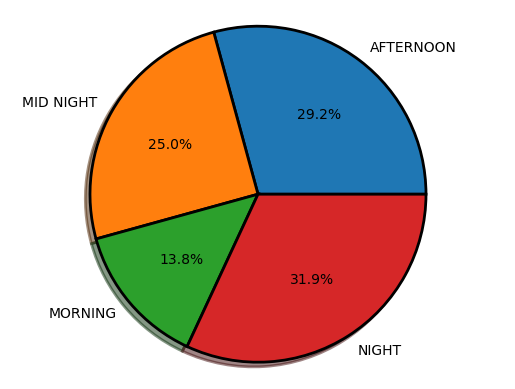

In [14]:
df3 = df[df['BOROUGH']=='BROOKLYN']
# columns = list(df3)
time1 = time(6,00,00)
time2 = time(12,00,00)
time3 = time(16,30,00)
time4 = time(22,00,00)
# dic = {}

# print(str(time1))
# for i,j in df3.iterrows():
#     if df3['CRASH TIME'][i]>=str(time4) or df3['CRASH TIME'][i]<str(time1):
#         dic[df3['COLLISION_ID'][i]] = "MID NIGHT"
#     elif df3['CRASH TIME'][i]>=str(time1) and df3['CRASH TIME'][i]<str(time2):
#         dic[df3['COLLISION_ID'][i]] = "MORNING"
#     elif df3['CRASH TIME'][i]>=str(time2) and df3['CRASH TIME'][i]<str(time3):
#         dic[df3['COLLISION_ID'][i]] = "AFTERNOON"
#     elif df3['CRASH TIME'][i] >= str(time3) and df3['CRASH TIME'][i]<str(time4):
#         dic[df3['COLLISION_ID'][i]] = "NIGHT"

def custom_time_func(row,time1,time2,time3,time4):
    if row['CRASH TIME']>=str(time4) or row['CRASH TIME']<str(time1):
        return "MID NIGHT"
    elif row['CRASH TIME']>=str(time1) and row['CRASH TIME']<str(time2):
        return "MORNING"
    elif row['CRASH TIME']>=str(time2) and row['CRASH TIME']<str(time3):
        return "AFTERNOON"
    elif row['CRASH TIME']>= str(time3) and row['CRASH TIME']<str(time4):
        return "NIGHT"

df3['CRASH_DAYTIME'] = df3.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
# df3

df3 = df3.groupby('CRASH_DAYTIME').count()
df4 = df3['CRASH DATE']
plt.pie(df4,labels = df4.index,
        autopct = '%1.1f%%',shadow = True,
        startangle = 0,
        wedgeprops = {"edgecolor":"black",
                    'linewidth': 2,
                    'antialiased': True})
plt.axis('equal')  
  
plt.show()

/tmp/ipykernel_14546/3002227797.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['CRASH_DAYTIME'] = df5.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)


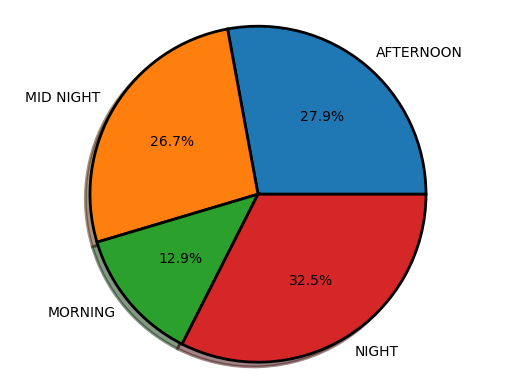

In [10]:
df5 = df[df['BOROUGH']=='BRONX']
# columns = list(df3)
time1 = time(6,00,00)
time2 = time(12,00,00)
time3 = time(16,30,00)
time4 = time(22,00,00)
# dic = {}

# print(str(time1))
# for i,j in df3.iterrows():
#     if df3['CRASH TIME'][i]>=str(time4) or df3['CRASH TIME'][i]<str(time1):
#         dic[df3['COLLISION_ID'][i]] = "MID NIGHT"
#     elif df3['CRASH TIME'][i]>=str(time1) and df3['CRASH TIME'][i]<str(time2):
#         dic[df3['COLLISION_ID'][i]] = "MORNING"
#     elif df3['CRASH TIME'][i]>=str(time2) and df3['CRASH TIME'][i]<str(time3):
#         dic[df3['COLLISION_ID'][i]] = "AFTERNOON"
#     elif df3['CRASH TIME'][i] >= str(time3) and df3['CRASH TIME'][i]<str(time4):
#         dic[df3['COLLISION_ID'][i]] = "NIGHT"

def custom_time_func(row,time1,time2,time3,time4):
    if row['CRASH TIME']>=str(time4) or row['CRASH TIME']<str(time1):
        return "MID NIGHT"
    elif row['CRASH TIME']>=str(time1) and row['CRASH TIME']<str(time2):
        return "MORNING"
    elif row['CRASH TIME']>=str(time2) and row['CRASH TIME']<str(time3):
        return "AFTERNOON"
    elif row['CRASH TIME']>= str(time3) and row['CRASH TIME']<str(time4):
        return "NIGHT"

df5['CRASH_DAYTIME'] = df5.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
# df3
df5 = df5.groupby('CRASH_DAYTIME').count()
df6= df5['CRASH DATE']
plt.pie(df6,labels = df6.index,
        autopct = '%1.1f%%',shadow = True,
        startangle = 0,
        wedgeprops = {"edgecolor":"black",
                    'linewidth': 2,
                    'antialiased': True})
plt.axis('equal')  
  
plt.show()

/tmp/ipykernel_14546/2586823364.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['CRASH_DAYTIME'] = df5.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)


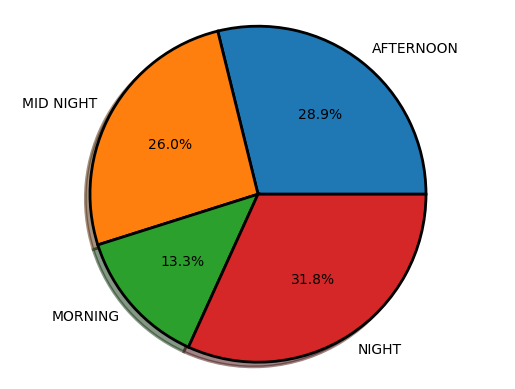

In [11]:
df5 = df[df['BOROUGH']=='QUEENS']
# columns = list(df3)
time1 = time(6,00,00)
time2 = time(12,00,00)
time3 = time(16,30,00)
time4 = time(22,00,00)
# dic = {}

# print(str(time1))
# for i,j in df3.iterrows():
#     if df3['CRASH TIME'][i]>=str(time4) or df3['CRASH TIME'][i]<str(time1):
#         dic[df3['COLLISION_ID'][i]] = "MID NIGHT"
#     elif df3['CRASH TIME'][i]>=str(time1) and df3['CRASH TIME'][i]<str(time2):
#         dic[df3['COLLISION_ID'][i]] = "MORNING"
#     elif df3['CRASH TIME'][i]>=str(time2) and df3['CRASH TIME'][i]<str(time3):
#         dic[df3['COLLISION_ID'][i]] = "AFTERNOON"
#     elif df3['CRASH TIME'][i] >= str(time3) and df3['CRASH TIME'][i]<str(time4):
#         dic[df3['COLLISION_ID'][i]] = "NIGHT"

def custom_time_func(row,time1,time2,time3,time4):
    if row['CRASH TIME']>=str(time4) or row['CRASH TIME']<str(time1):
        return "MID NIGHT"
    elif row['CRASH TIME']>=str(time1) and row['CRASH TIME']<str(time2):
        return "MORNING"
    elif row['CRASH TIME']>=str(time2) and row['CRASH TIME']<str(time3):
        return "AFTERNOON"
    elif row['CRASH TIME']>= str(time3) and row['CRASH TIME']<str(time4):
        return "NIGHT"

df5['CRASH_DAYTIME'] = df5.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
# df3
df5 = df5.groupby('CRASH_DAYTIME').count()
df6= df5['CRASH DATE']
plt.pie(df6,labels = df6.index,
        autopct = '%1.1f%%',shadow = True,
        startangle = 0,
        wedgeprops = {"edgecolor":"black",
                    'linewidth': 2,
                    'antialiased': True})
plt.axis('equal')  
  
plt.show()

/tmp/ipykernel_14546/2492305006.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['CRASH_DAYTIME'] = df5.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)


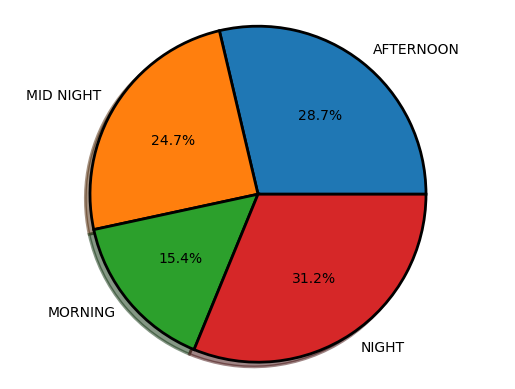

In [12]:
df5 = df[df['BOROUGH']=='MANHATTAN']
# columns = list(df3)
time1 = time(6,00,00)
time2 = time(12,00,00)
time3 = time(16,30,00)
time4 = time(22,00,00)
# dic = {}

# print(str(time1))
# for i,j in df3.iterrows():
#     if df3['CRASH TIME'][i]>=str(time4) or df3['CRASH TIME'][i]<str(time1):
#         dic[df3['COLLISION_ID'][i]] = "MID NIGHT"
#     elif df3['CRASH TIME'][i]>=str(time1) and df3['CRASH TIME'][i]<str(time2):
#         dic[df3['COLLISION_ID'][i]] = "MORNING"
#     elif df3['CRASH TIME'][i]>=str(time2) and df3['CRASH TIME'][i]<str(time3):
#         dic[df3['COLLISION_ID'][i]] = "AFTERNOON"
#     elif df3['CRASH TIME'][i] >= str(time3) and df3['CRASH TIME'][i]<str(time4):
#         dic[df3['COLLISION_ID'][i]] = "NIGHT"

def custom_time_func(row,time1,time2,time3,time4):
    if row['CRASH TIME']>=str(time4) or row['CRASH TIME']<str(time1):
        return "MID NIGHT"
    elif row['CRASH TIME']>=str(time1) and row['CRASH TIME']<str(time2):
        return "MORNING"
    elif row['CRASH TIME']>=str(time2) and row['CRASH TIME']<str(time3):
        return "AFTERNOON"
    elif row['CRASH TIME']>= str(time3) and row['CRASH TIME']<str(time4):
        return "NIGHT"

df5['CRASH_DAYTIME'] = df5.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
# df3
df5 = df5.groupby('CRASH_DAYTIME').count()
df6= df5['CRASH DATE']
plt.pie(df6,labels = df6.index,
        autopct = '%1.1f%%',shadow = True,
        startangle = 0,
        wedgeprops = {"edgecolor":"black",
                    'linewidth': 2,
                    'antialiased': True})
plt.axis('equal')  
  
plt.show()

/tmp/ipykernel_14546/900884620.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['CRASH_DAYTIME'] = df5.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)


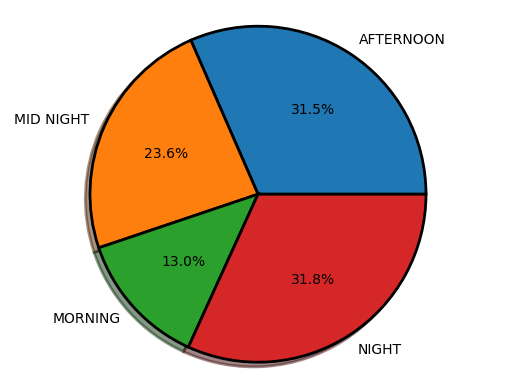

In [13]:
df5 = df[df['BOROUGH']=='STATEN ISLAND']
# columns = list(df3)
time1 = time(6,00,00)
time2 = time(12,00,00)
time3 = time(16,30,00)
time4 = time(22,00,00)
# dic = {}

# print(str(time1))
# for i,j in df3.iterrows():
#     if df3['CRASH TIME'][i]>=str(time4) or df3['CRASH TIME'][i]<str(time1):
#         dic[df3['COLLISION_ID'][i]] = "MID NIGHT"
#     elif df3['CRASH TIME'][i]>=str(time1) and df3['CRASH TIME'][i]<str(time2):
#         dic[df3['COLLISION_ID'][i]] = "MORNING"
#     elif df3['CRASH TIME'][i]>=str(time2) and df3['CRASH TIME'][i]<str(time3):
#         dic[df3['COLLISION_ID'][i]] = "AFTERNOON"
#     elif df3['CRASH TIME'][i] >= str(time3) and df3['CRASH TIME'][i]<str(time4):
#         dic[df3['COLLISION_ID'][i]] = "NIGHT"

def custom_time_func(row,time1,time2,time3,time4):
    if row['CRASH TIME']>=str(time4) or row['CRASH TIME']<str(time1):
        return "MID NIGHT"
    elif row['CRASH TIME']>=str(time1) and row['CRASH TIME']<str(time2):
        return "MORNING"
    elif row['CRASH TIME']>=str(time2) and row['CRASH TIME']<str(time3):
        return "AFTERNOON"
    elif row['CRASH TIME']>= str(time3) and row['CRASH TIME']<str(time4):
        return "NIGHT"

df5['CRASH_DAYTIME'] = df5.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
# df3
df5 = df5.groupby('CRASH_DAYTIME').count()
df6= df5['CRASH DATE']
plt.pie(df6,labels = df6.index,
        autopct = '%1.1f%%',shadow = True,
        startangle = 0,
        wedgeprops = {"edgecolor":"black",
                    'linewidth': 2,
                    'antialiased': True})
plt.axis('equal')  
  
plt.show()